<a href="https://colab.research.google.com/github/Leonaxi/Machine-Learning-in-Finance/blob/main/%E2%80%9CL_8_LSMC_Black_Scholes_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
# Data
σ = 0.04
r = 0.01
K = 35

# Design choice
dt = 0.1
# time horizon is 1, we have to apply for this dynamic function for 10 times
# computer cannot stimulate continious problems, dt should be close to zero, but in our code, we can only use a number like 0.1; it is a protential bad thing

In [3]:
# simulation function of black shores model
def S_next(S):
  dZ = np.random.normal(size=S.size) * np.sqrt(dt)
  dS = r * S  * dt + σ  * S  * dZ
  S = S + dS # S1= S0 + dS
  return S


In [4]:
# Simulation模拟测试 the evolution of the stock ( and the payoff of the call) for
# 200000 different initial stock prices S0: take value between 30 and 40
# create variable S0
S0 = np.linspace(30, 40, 200000) # create variable S0: size=200000
print(S0[:10])

[30.      30.00005 30.0001  30.00015 30.0002  30.00025 30.0003  30.00035
 30.0004  30.00045]


In [7]:
S = S0  #initialize the s to s0
for t in range(10): # for duration in 1 to 10: can change it to larger numbers
  S = S_next(S)   # the new value for the stock price S=S1 will be given in the S_next(S) function created above

S_next(S)

array([30.90218404, 31.06070152, 30.04714886, ..., 42.53794262,
       40.8314713 , 42.78498831])

In [9]:
S1 = S
payoff_call = np.maximum(S1 - K, 0)
discounted_payoff_call = payoff_call * np.exp(-r)

# regression data
y = discounted_payoff_call
ones = np.ones_like(S0)
X = np.column_stack([S0**k for k in range(20)]) # suppose S=S**k
# features metrix X = np.column_stack([ones, S0, S0**2, S0**3, S0**4])


# Solution of the regression problem
# Θ = np.linalg.inv(X.T @ X) @ X.T @ y
# Θ = np.linalg.solve(X.T @ X, X.T @ y)
Θ = np.linalg.lstsq(X, y)[0]  # fist element is the coefficient, which is theta

def C(S0):  # prediction function f(x)=X*theta=Call price
  return X @ Θ

# problem: limited to much because we have to use it in linear ploynomial methods; we should increase ploynomial order to make it

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


In [11]:
np.linalg.lstsq(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([ 2.93726506e-37, -5.65089376e-23,  1.74496619e-25, -2.20658280e-28,
         3.83366839e-31,  2.61652025e-30,  5.90008594e-29,  1.27531247e-27,
         2.61724689e-26,  5.03051109e-25,  8.87744658e-24,  1.39480048e-22,
         1.85210284e-21,  1.87710373e-20,  1.11247376e-19,  2.14908750e-21,
        -1.11673169e-21,  5.86139557e-23, -1.18876572e-24,  8.60582456e-27]),
 array([], dtype=float64),
 6,
 array([3.93819141e+32, 2.65909292e+29, 3.79960303e+26, 7.61925590e+23,
        1.63253539e+21, 3.45606535e+18, 7.32856633e+15, 3.68103060e+14,
        3.73754892e+12, 2.48544268e+10, 7.49902224e+08, 8.75990230e+05,
        6.08782358e+04, 2.26598490e+03, 4.52267793e+02, 7.32684997e+01,
        2.34515166e-01, 1.13827703e-01, 4.19432514e-03, 2.70596074e-10]))

In [12]:
Θ

array([ 2.93726506e-37, -5.65089376e-23,  1.74496619e-25, -2.20658280e-28,
        3.83366839e-31,  2.61652025e-30,  5.90008594e-29,  1.27531247e-27,
        2.61724689e-26,  5.03051109e-25,  8.87744658e-24,  1.39480048e-22,
        1.85210284e-21,  1.87710373e-20,  1.11247376e-19,  2.14908750e-21,
       -1.11673169e-21,  5.86139557e-23, -1.18876572e-24,  8.60582456e-27])

In [ ]:
t = 0
T = 1
def analytical_formula(S):
    d1 = 1 / (σ * np.sqrt(T - t)) * (np.log(S / K) + (r + σ**2 / 2) * (T - t))
    d2 = d1 - σ * np.sqrt(T - t)
    PV = K * np.exp(-r * (T - t))

    N = norm.cdf
    C = N(d1) * S - N(d2) * PV
    return C


# S0 = np.linspace(30, 40, 100)
C_BS = analytical_formula(S0)

Text(0, 0.5, 'C0')

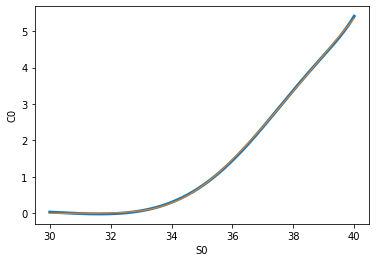

In [ ]:

plt.plot(S0, C(S0), lw=3)
plt.plot(S0, C_BS, lw=1)
plt.xlabel('S0')
plt.ylabel('C0')
# blue: approximation; orange: actual

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


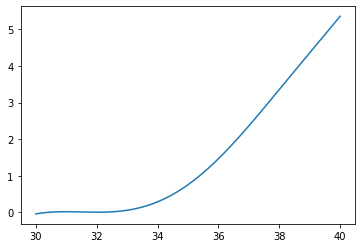

In [ ]:
plt.plot(S0, C)

In [ ]:
# ... simulation
K = 30
payoff_call = np.maximum(S - K, 0)  # definition of a call
payoff_put = np.maximum(K - S, 0)  # definition of a call
C = np.mean(payoff_call * np.exp(-r))  # FTAP
P = np.mean(payoff_put * np.exp(-r))  # FTAP
print(C)
print(P)


5.321003405274581
0.024876230833967925


(array([4.388e+03, 7.760e+02, 8.690e+02, 9.600e+02, 1.025e+03, 1.058e+03,
        1.176e+03, 1.193e+03, 1.232e+03, 1.298e+03, 1.384e+03, 1.389e+03,
        1.428e+03, 1.483e+03, 1.534e+03, 1.475e+03, 1.511e+03, 1.537e+03,
        1.489e+03, 1.514e+03, 1.569e+03, 1.600e+03, 1.498e+03, 1.521e+03,
        1.627e+03, 1.489e+03, 1.520e+03, 1.584e+03, 1.566e+03, 1.569e+03,
        1.579e+03, 1.546e+03, 1.535e+03, 1.589e+03, 1.507e+03, 1.524e+03,
        1.560e+03, 1.619e+03, 1.577e+03, 1.547e+03, 1.607e+03, 1.526e+03,
        1.553e+03, 1.509e+03, 1.542e+03, 1.519e+03, 1.533e+03, 1.509e+03,
        1.481e+03, 1.532e+03, 1.490e+03, 1.407e+03, 1.414e+03, 1.355e+03,
        1.344e+03, 1.345e+03, 1.260e+03, 1.214e+03, 1.159e+03, 1.120e+03,
        1.133e+03, 1.065e+03, 9.410e+02, 8.790e+02, 8.310e+02, 7.800e+02,
        7.230e+02, 6.160e+02, 6.260e+02, 5.420e+02, 5.100e+02, 4.390e+02,
        4.190e+02, 3.310e+02, 3.020e+02, 2.660e+02, 2.230e+02, 1.900e+02,
        1.800e+02, 1.440e+02, 9.300e+0

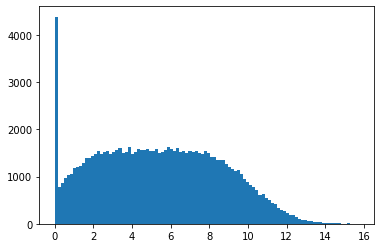

In [ ]:
plt.hist(payoff_call, 100)

(array([2.000e+00, 4.000e+00, 4.000e+00, 1.000e+01, 1.500e+01, 2.400e+01,
        3.600e+01, 4.400e+01, 7.700e+01, 1.160e+02, 1.450e+02, 2.030e+02,
        2.580e+02, 3.800e+02, 4.430e+02, 5.480e+02, 5.990e+02, 7.490e+02,
        8.840e+02, 9.870e+02, 1.122e+03, 1.236e+03, 1.299e+03, 1.414e+03,
        1.501e+03, 1.529e+03, 1.685e+03, 1.697e+03, 1.750e+03, 1.854e+03,
        1.818e+03, 1.842e+03, 1.842e+03, 1.843e+03, 1.859e+03, 1.964e+03,
        1.846e+03, 1.898e+03, 1.919e+03, 1.818e+03, 1.939e+03, 1.891e+03,
        1.918e+03, 1.928e+03, 1.854e+03, 1.933e+03, 1.824e+03, 1.866e+03,
        2.002e+03, 1.908e+03, 1.916e+03, 1.874e+03, 1.919e+03, 1.851e+03,
        1.855e+03, 1.899e+03, 1.827e+03, 1.832e+03, 1.850e+03, 1.811e+03,
        1.717e+03, 1.694e+03, 1.607e+03, 1.650e+03, 1.495e+03, 1.489e+03,
        1.366e+03, 1.379e+03, 1.280e+03, 1.137e+03, 1.023e+03, 1.003e+03,
        8.540e+02, 7.580e+02, 7.290e+02, 6.350e+02, 5.460e+02, 5.150e+02,
        3.900e+02, 3.510e+02, 2.750e+0

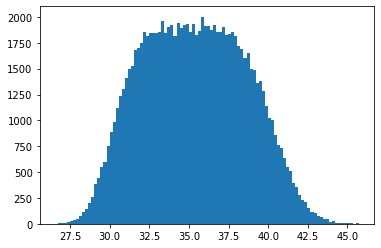

In [ ]:
plt.hist(S, 100)